In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/train.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
print(len(df.columns))

21


In [4]:
X = df.iloc[:, :20].values
y = df.iloc[:, 20:21].values
y

array([[1],
       [2],
       [2],
       ...,
       [3],
       [0],
       [3]])

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
print(f"Sample input: {X[0]}")

from sklearn.preprocessing import OneHotEncoder
oh = OneHotEncoder()
y = oh.fit_transform(y).toarray()
print(f"Sample output: {y[0]}")

Sample input: [-0.90259726 -0.9900495   0.83077942 -1.01918398 -0.76249466 -1.04396559
 -1.38064353  0.34073951  1.34924881 -1.10197128 -1.3057501  -1.40894856
 -1.14678403  0.39170341 -0.78498329  0.2831028   1.46249332 -1.78686097
 -1.00601811  0.98609664]
Sample output: [0. 1. 0. 0.]


In [6]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [7]:
import keras 
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

# add input layer 
layer1 = Dense(64, input_dim=20, activation='relu')
model.add(layer1)

# layer2 = Dense(32, activation='relu')
# model.add(layer2)

# layer3 = Dense(16, activation='relu')
# model.add(layer3)

output_layer = Dense(4, activation='softmax')
model.add(output_layer)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



In [8]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
50/50 [==============================] - 0s 3ms/step - loss: 1.4169 - accuracy: 0.3187 - val_loss: 1.3117 - val_accuracy: 0.3750
Epoch 2/10
50/50 [==============================] - 0s 1ms/step - loss: 1.1734 - accuracy: 0.5063 - val_loss: 1.1487 - val_accuracy: 0.5100
Epoch 3/10
50/50 [==============================] - 0s 1ms/step - loss: 1.0172 - accuracy: 0.6206 - val_loss: 1.0152 - val_accuracy: 0.5875
Epoch 4/10
50/50 [==============================] - 0s 1ms/step - loss: 0.8898 - accuracy: 0.6944 - val_loss: 0.9019 - val_accuracy: 0.6375
Epoch 5/10
50/50 [==============================] - 0s 1ms/step - loss: 0.7837 - accuracy: 0.7250 - val_loss: 0.8083 - val_accuracy: 0.6950
Epoch 6/10
50/50 [==============================] - 0s 1ms/step - loss: 0.6983 - accuracy: 0.7775 - val_loss: 0.7327 - val_accuracy: 0.7325
Epoch 7/10
50/50 [==============================] - 0s 1ms/step - loss: 0.6262 - accuracy: 0.8081 - val_loss: 0.6672 - val_accuracy: 0.7725
Epoch 8/10
50/50 [==

In [9]:
import numpy as np 
y_test_pred = model.predict(X_test)
y_test_pred_class = []
for i in range(len(y_test_pred)):
    pred_class = np.argmax(y_test_pred[i])
    y_test_pred_class.append(pred_class)

y_test_class = []
for i in range(len(y_test)):
    pred_class = np.argmax(y_test[i])
    y_test_class.append(pred_class)

print(f"Sample prediction vector: {y_test_pred[0]}")
print(f"Sample prediction class: {y_test_pred_class[0]}")
print(f"Sample test vector: {y_test[0]}")
print(f"Sample test class: {y_test_class[0]}")

Sample prediction vector: [4.7601297e-04 1.5058735e-02 2.2556153e-01 7.5890368e-01]
Sample prediction class: 3
Sample test vector: [0. 0. 0. 1.]
Sample test class: 3


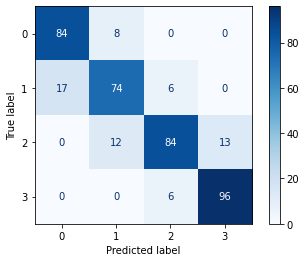

In [10]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt 

cm = confusion_matrix(y_test_class, y_test_pred_class)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

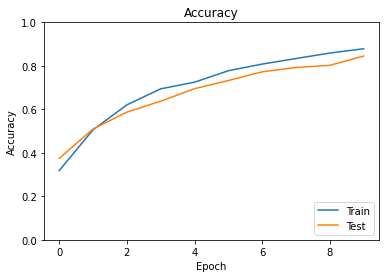

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.ylim(0, 1)
# plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

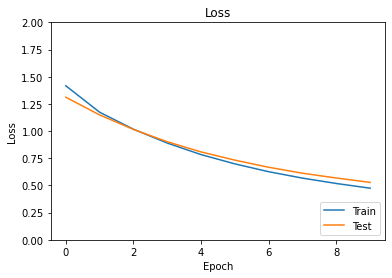

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.ylim(0, 2)
# plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1344      
                                                                 
 dense_1 (Dense)             (None, 4)                 260       
                                                                 
Total params: 1,604
Trainable params: 1,604
Non-trainable params: 0
_________________________________________________________________


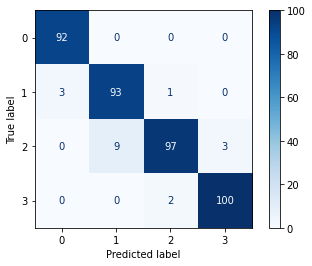

In [14]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

y_train_class = []
for i in range(len(y_train)):
    pred_class = np.argmax(y_train[i])
    y_train_class.append(pred_class)
    
clf.fit(X_train, y_train_class)
y_test_pred_lr = clf.predict(X_test)

cm = confusion_matrix(y_test_class, y_test_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [15]:
coefficients = pd.concat([pd.DataFrame(df.columns),pd.DataFrame(np.transpose(clf.coef_))], axis = 1)
coefficients.columns = ['Feature', 'Class 0', 'Class 1', 'Class 2', 'Class 3']

In [16]:
coefficients

,Feature,Class 0,Class 1,Class 2,Class 3
0,battery_power,-2.725575,-0.895307,0.827138,2.793745
1,blue,-0.033995,-0.029511,0.031025,0.032480
2,clock_speed,0.004346,-0.018684,0.019774,-0.005436
3,dual_sim,0.069522,0.009590,-0.067194,-0.011917
4,fc,-0.062338,0.009482,0.004399,0.048457
5,four_g,-0.068149,0.024878,-0.064478,0.107749
6,int_memory,-0.206236,-0.049791,-0.000427,0.256455
7,m_dep,0.043425,0.110133,-0.081363,-0.072195
8,mobile_wt,0.348973,0.142021,0.018399,-0.509393
9,n_cores,-0.015902,-0.098515,0.042016,0.072402


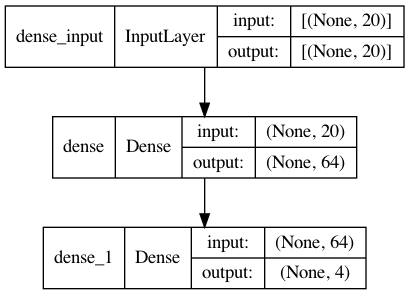

In [17]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [18]:
from ann_visualizer.visualize import ann_viz;

ann_viz(model, title="My first network")